In [1]:
import numpy as np
import pandas as pd

from pathlib import Path
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, classification_report, auc
import matplotlib.pyplot as plt 
import seaborn as sns

import os
from joblib import dump, load

In [68]:
white_df = pd.read_csv('resources/whitewines.csv',sep=',')
white_df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [3]:
white_df.shape

(4898, 12)

In [4]:
white_df.info()
white_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
white_df.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

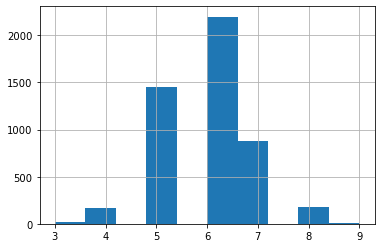

In [6]:
white_df.quality.hist()

In [7]:
# bins = (2, 6.5, 8)
# group_names = [0,1] # poor quality = 0, good quality = 1
# white_df['quality_bin'] = pd.cut(white_df['quality'], bins = bins, labels = group_names)
# white_df.head(10)

In [8]:
# poor quality = 0, good quality = 1
white_df['quality'] = white_df['quality'].apply(lambda qual: 1 if qual>=6.0 else 0)

In [9]:
white_df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,1
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,1


In [10]:
white_df.duplicated().sum()

937

In [11]:
X = white_df.drop('quality', axis=1)
X.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0


In [12]:
y = LabelEncoder().fit_transform(white_df['quality'])
y

array([1, 1, 1, ..., 1, 1, 1])

# Logistic Regression

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [14]:
LogR = LogisticRegression(max_iter=10000, random_state = 42).fit(X_train, y_train)
print(f"Training Data Score: {LogR.score(X_train, y_train)}")
print(f"Testing Data Score: {LogR.score(X_test, y_test)}")

Training Data Score: 0.7508848352845086
Testing Data Score: 0.7363265306122448


In [15]:
target_names = ["good", "poor"]
predictions = LogR.predict(X_test)

y_true = y_test
y_pred = LogR.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        good       0.62      0.50      0.55       397
        poor       0.78      0.85      0.81       828

    accuracy                           0.74      1225
   macro avg       0.70      0.67      0.68      1225
weighted avg       0.73      0.74      0.73      1225



In [16]:
print("Accuracy:",metrics.accuracy_score(y_true, y_pred))
print("Precision:",metrics.precision_score(y_true, y_pred))
print("Sensitivity:",metrics.recall_score(y_true, y_pred))

Accuracy: 0.7363265306122448
Precision: 0.7790055248618785
Sensitivity: 0.8514492753623188


Text(0.5, 257.44, 'Predicted label')

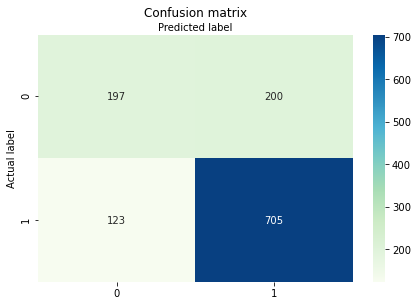

In [17]:
class_names=["poor_wine","good_wine"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="GnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

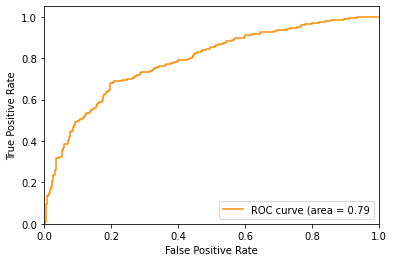

In [18]:
y_pred_proba = LogR.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.plot(fpr,tpr, color = 'darkorange',
         label = f'ROC curve (area = {auc:0.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

# Logistic Regression Scaled

In [19]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
LogR_scaled = LogisticRegression(max_iter=10000, random_state = 42).fit(X_train_scaled, y_train)
print(f"Training Data Score: {LogR_scaled.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {LogR_scaled.score(X_test_scaled, y_test)}")

Training Data Score: 0.7541519194119248
Testing Data Score: 0.7453061224489796


In [21]:
predictions = LogR_scaled.predict(X_test_scaled)

y_true1 = y_test
y_scaled_pred = LogR_scaled.predict(X_test_scaled)
cm = confusion_matrix(y_true1, y_scaled_pred)
cm
print(classification_report(y_true1, y_scaled_pred, target_names=target_names))

              precision    recall  f1-score   support

        good       0.64      0.50      0.56       397
        poor       0.78      0.86      0.82       828

    accuracy                           0.75      1225
   macro avg       0.71      0.68      0.69      1225
weighted avg       0.73      0.75      0.74      1225



In [22]:
print("Accuracy:",metrics.accuracy_score(y_true1, y_scaled_pred))
print("Precision:",metrics.precision_score(y_true1, y_scaled_pred))
print("Sensitivity:",metrics.recall_score(y_true1, y_scaled_pred))

Accuracy: 0.7453061224489796
Precision: 0.7816593886462883
Sensitivity: 0.8647342995169082


# Additional Models

In [23]:
def test_model(model, data):
    X_train_scaled, X_test_scaled, y_train, y_test = data
    reg = model.fit(X_train_scaled, y_train)
    print(f'Model: {type(reg).__name__}')
    print(f'Train score: {reg.score(X_train_scaled, y_train)}')
    print(f'Test Score: {reg.score(X_test_scaled, y_test)}\n')
    #plt.show()

In [24]:
data = [X_train_scaled, X_test_scaled, y_train, y_test]

In [25]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.svm import SVR

In [26]:
print("---------------------")
print("Regressors")
print("---------------------")
test_model(LinearRegression(), data)
test_model(KNeighborsRegressor(), data)
test_model(RandomForestRegressor(), data)
test_model(ExtraTreesRegressor(), data)
test_model(AdaBoostRegressor(), data)
test_model(SVR(C=1.0, epsilon=0.2), data)
print("---------------------")
print("Classifiers")
print("---------------------")
test_model(KNeighborsClassifier(), data)
test_model(RandomForestClassifier(), data)
test_model(ExtraTreesClassifier(), data)
test_model(AdaBoostClassifier(), data)
test_model(SVC(kernel="rbf"), data)

---------------------
Regressors
---------------------
Model: LinearRegression
Train score: 0.2390461016981147
Test Score: 0.221843184215624

Model: KNeighborsRegressor
Train score: 0.5239007710669459
Test Score: 0.2510982124387007

Model: RandomForestRegressor
Train score: 0.9242385456664316
Test Score: 0.43778478990983094

Model: ExtraTreesRegressor
Train score: 1.0
Test Score: 0.4661838790931989

Model: AdaBoostRegressor
Train score: 0.25480081066943305
Test Score: 0.2139292940174825

Model: SVR
Train score: 0.4637255864441642
Test Score: 0.2911439378612686

---------------------
Classifiers
---------------------
Model: KNeighborsClassifier
Train score: 0.8448135039477267
Test Score: 0.7665306122448979

Model: RandomForestClassifier
Train score: 1.0
Test Score: 0.8228571428571428

Model: ExtraTreesClassifier
Train score: 1.0
Test Score: 0.8285714285714286

Model: AdaBoostClassifier
Train score: 0.7854614756329975
Test Score: 0.7648979591836734

Model: SVC
Train score: 0.812687176694

In [27]:
def test_model2(model, data1):
    X_train, X_test, y_train, y_test = data1
    reg2 = model.fit(X_train, y_train)
    print(f'Model: {type(reg2).__name__}')
    print(f'Train score: {reg2.score(X_train, y_train)}')
    print(f'Test Score: {reg2.score(X_test, y_test)}\n')
    #plt.show()

In [28]:
data1 = [X_train, X_test, y_train, y_test]

In [29]:
print("---------------------")
print("Regressors")
print("---------------------")
test_model2(LinearRegression(), data1)
test_model2(KNeighborsRegressor(), data1)
test_model2(RandomForestRegressor(), data1)
test_model2(ExtraTreesRegressor(), data1)
test_model2(AdaBoostRegressor(), data1)
test_model2(SVR(C=1.0, epsilon=0.2), data1)
print("---------------------")
print("Classifiers")
print("---------------------")
test_model2(KNeighborsClassifier(), data1)
test_model2(RandomForestClassifier(), data1)
test_model2(ExtraTreesClassifier(), data1)
test_model2(AdaBoostClassifier(), data1)
test_model2(SVC(kernel="rbf"), data1)

---------------------
Regressors
---------------------
Model: LinearRegression
Train score: 0.2390461016981149
Test Score: 0.2218431842156241

Model: KNeighborsRegressor
Train score: 0.39125645176775947
Test Score: 0.070282553937137

Model: RandomForestRegressor
Train score: 0.9228566516028857
Test Score: 0.4398266056413438

Model: ExtraTreesRegressor
Train score: 1.0
Test Score: 0.47141978181773925

Model: AdaBoostRegressor
Train score: 0.2663298058031347
Test Score: 0.2141314222100822

Model: SVR
Train score: 0.05204262570654883
Test Score: 0.05640471116558521

---------------------
Classifiers
---------------------
Model: KNeighborsClassifier
Train score: 0.7963517560577185
Test Score: 0.6979591836734694

Model: RandomForestClassifier
Train score: 1.0
Test Score: 0.8326530612244898

Model: ExtraTreesClassifier
Train score: 1.0
Test Score: 0.8424489795918367

Model: AdaBoostClassifier
Train score: 0.7854614756329975
Test Score: 0.7648979591836734

Model: SVC
Train score: 0.6618567928

# RandomForestClassifier Model

In [30]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0, n_estimators=500, max_depth=30).fit(X_train, y_train)
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')
clf

Training Score: 1.0
Testing Score: 0.833469387755102


RandomForestClassifier(max_depth=30, n_estimators=500, random_state=0)

In [31]:
y_r_pred = clf.predict(X_test)
y_true_clf = y_test
cm_r = confusion_matrix(y_true_clf, y_r_pred)
cm_r

print(classification_report(y_true_clf, y_r_pred, target_names=target_names))
cm_r

              precision    recall  f1-score   support

        good       0.76      0.71      0.73       397
        poor       0.86      0.89      0.88       828

    accuracy                           0.83      1225
   macro avg       0.81      0.80      0.81      1225
weighted avg       0.83      0.83      0.83      1225



array([[280, 117],
       [ 87, 741]])

In [32]:
print("Accuracy:",metrics.accuracy_score(y_true_clf, y_r_pred))
print("Precision:",metrics.precision_score(y_true_clf, y_r_pred))
print("Sensitivity:",metrics.recall_score(y_true_clf, y_r_pred))

Accuracy: 0.833469387755102
Precision: 0.8636363636363636
Sensitivity: 0.894927536231884


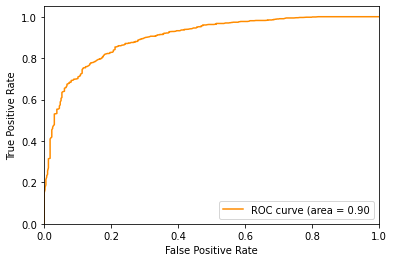

In [33]:
yclf_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  yclf_pred_proba)
auc = metrics.roc_auc_score(y_test, yclf_pred_proba)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.plot(fpr,tpr, color = 'darkorange',
         label = f'ROC curve (area = {auc:0.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

# RandomForestClassifier Scaled

In [34]:
clf_scaled = RandomForestClassifier(random_state=0, n_estimators=500, max_depth=30).fit(X_train_scaled, y_train)
print(f"Training Data Score: {clf_scaled.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {clf_scaled.score(X_test_scaled, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.8326530612244898


In [35]:
predictions = clf_scaled.predict(X_test_scaled)

y_true_clf1 = y_test
y_clf_scaled_pred = clf_scaled.predict(X_test_scaled)
cm = confusion_matrix(y_true_clf1, y_clf_scaled_pred)
cm
print(classification_report(y_true_clf1, y_clf_scaled_pred, target_names=target_names))

              precision    recall  f1-score   support

        good       0.76      0.70      0.73       397
        poor       0.86      0.89      0.88       828

    accuracy                           0.83      1225
   macro avg       0.81      0.80      0.80      1225
weighted avg       0.83      0.83      0.83      1225



In [36]:
print("Accuracy:",metrics.accuracy_score(y_true_clf1, y_clf_scaled_pred))
print("Precision:",metrics.precision_score(y_true_clf1, y_clf_scaled_pred))
print("Sensitivity:",metrics.recall_score(y_true_clf1, y_clf_scaled_pred))

Accuracy: 0.8326530612244898
Precision: 0.8626309662398137
Sensitivity: 0.894927536231884


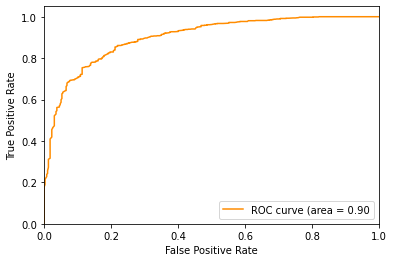

In [37]:
yclf_scaled_pred_proba = clf_scaled.predict_proba(X_test_scaled)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  yclf_scaled_pred_proba)
auc = metrics.roc_auc_score(y_test, yclf_scaled_pred_proba)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.plot(fpr,tpr, color = 'darkorange',
         label = f'ROC curve (area = {auc:0.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

# Extra Trees Classifier

In [38]:
etc = ExtraTreesClassifier(random_state=1, n_estimators=500).fit(X_train, y_train)
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')

Training Score: 1.0
Testing Score: 0.833469387755102


In [40]:
etc_scaled = ExtraTreesClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.3452218894636537
Testing Score: 0.3273469387755102


# KNN 

In [41]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 1.000/0.791
k: 3, Train/Test Score: 0.882/0.757
k: 5, Train/Test Score: 0.845/0.767
k: 7, Train/Test Score: 0.822/0.771
k: 9, Train/Test Score: 0.814/0.772
k: 11, Train/Test Score: 0.798/0.765
k: 13, Train/Test Score: 0.793/0.767
k: 15, Train/Test Score: 0.794/0.764
k: 17, Train/Test Score: 0.794/0.769
k: 19, Train/Test Score: 0.793/0.762


# RandomForest Feature Importances and Selection

[('sulphates', 0.0648168651181974), ('fixed acidity', 0.06655029971272759), ('pH', 0.07289444834259468), ('citric acid', 0.07968898903590381), ('chlorides', 0.0802490783380697), ('residual sugar', 0.0809528089233998), ('total sulfur dioxide', 0.08581279038423163), ('free sulfur dioxide', 0.09495679649626912), ('density', 0.10885768007672232), ('volatile acidity', 0.1215325247098184), ('alcohol', 0.14368771886206572)]


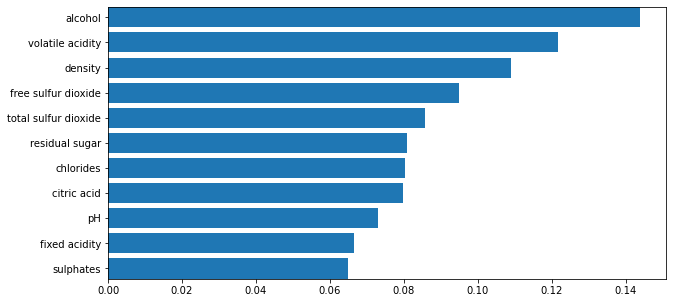

In [42]:
%matplotlib inline

feature_importances = clf.feature_importances_
features1 = sorted(zip(X_test.columns, feature_importances), key = lambda x: x[1])
cols = [f[0] for f in features1]
width = [f[1] for f in features1]
print(features1)
fig, ax = plt.subplots()

fig.set_size_inches(10,5)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [58]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf)
sel.fit(X_train, y_train)
sel.get_support()

array([False, False, False,  True, False,  True,  True,  True,  True,
       False, False])

In [61]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)
X_selected_train

array([[  1.3    ,  37.     , 104.     ,   0.98865,   3.11   ],
       [  1.2    ,  27.     ,  84.     ,   0.9928 ,   3.33   ],
       [  1.4    ,  39.     , 149.     ,   0.99254,   3.4    ],
       ...,
       [  1.6    ,   9.     , 101.     ,   0.994  ,   3.06   ],
       [ 12.1    ,  54.     , 135.     ,   0.99481,   3.21   ],
       [ 14.3    ,  55.     , 194.     ,   0.9979 ,   3.09   ]])

In [60]:
ran_sel = RandomForestClassifier()
ran_sel.fit(X_selected_train_scaled, y_train)
print(f'Training Score: {ran_sel.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {ran_sel.score(X_selected_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.8057142857142857


In [70]:
dump(clf, "white_wine_model.joblib")

['white_wine_model.joblib']

In [71]:
white_wine_model = load("white_wine_model.joblib")

In [72]:
# white_wine_model.predict(fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol)
print(white_wine_model.predict([[8.1, 0.28, 0.40, 6.9, 0.050, 30.0, 97.0, 0.9951, 3.26, 0.44, 10.1]]))

[1]
